# Regresión - Mínimos cuadrados

### Integrantes:

* Yesid Rosas Toro
* Samara Rincon Montaña
* Cristian Camilo Quiceno

Todo los puntos realizados en el taller deben ser realizados con base a lo visto en clase.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio

Dada la siguiente $t$:

In [2]:
data = sio.loadmat('Datasets/dataDEAP.mat')
t = data['HR'].T[0]

1- Realice un gráfico del 0 al 1 que enseñe el comportamiento del vector $t$ (0.2).

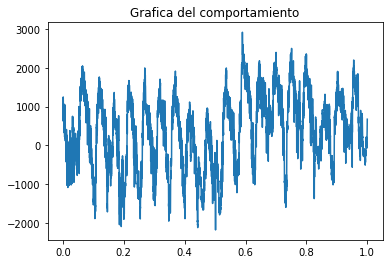

In [3]:
x = np.linspace(0, 1, len(t))
y = np.array(t)

plt.title("Grafica del comportamiento")
plt.plot(x, y)
plt.show()

2- Programe tres funciones una para el manejo de la función polinomial, otra para la función exponencial y otra para la función Sigmoidal. Use para la función exponencial un $s = 0.07$ y para la función sigmoidal un $s = 0.01$. Cada una de las funciones debe recibir dos parámetros. (0.4)

In [4]:
def polinomial(xp, yp):
    return xp ** yp

def exponencial(xe, ue):
    return np.exp(-(((xe-ue)**2)/(2*((0.07)**2))))

def sigmoidal (xs, us):
    return (1)/(1+np.exp(-((xs-us)/0.01)))

2- Programe una función que genere la matriz $\phi$ ($phi$) por medio de una función que reciba como parámetros el vector $x$, un vector de tamaño m y la función base a usar. (0.4)  

In [5]:
def generarPhi(x, m, fn):
    phi = np.ones((len(x), len(m)))
    
    for i in range(len(x)):
        for j in range(1, len(m)):
            phi[i][j] = fn(x[i], m[j])
    
    return phi

3- Definia una función para generar W usando minimos cuadrados, debe recibir como parámetros $\phi$ y el vector t. (0.4) 

In [6]:
def generarW(phi, x):
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ x
    return w

4- Defina una función para calcular el error medio cuadrático. (0.4)

In [7]:
def error_medio(r, p):
    error = (np.square(r - p)).mean() / 2
    return error

4- Defina el $m = 10$ para generar un $\phi$ que se adapte a los valores de $t$, en este caso use la función polinomial. Tambien use un vector que inicie en el valor 0 hasta $m-1$. Genere la respectiva gráfica comparativa que muestre la solución. (0.5)

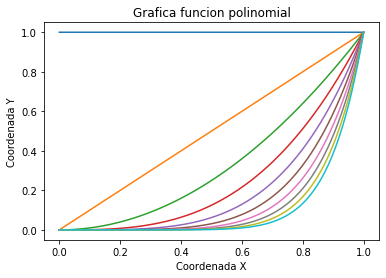

In [12]:
x = np.linspace(0, 1, len(t))

m = 10
v = np.arange(m)

phi = generarPhi(x, v, polinomial)

plt.plot(x, phi)

plt.title("Grafica funcion polinomial")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")

plt.show()

5- Usando la función polinómica genere un gráfico comparativo (subplot) usando $m = 10, 15, 25, 40$. En cada gráfico debe representar los valores de $t$ y $\hat{t}$. Interprete las gráficas y explique que esta sucediendo. Para cada gráfico calcule el error de $\hat{t}$ con respecto a $t$. (0.9)

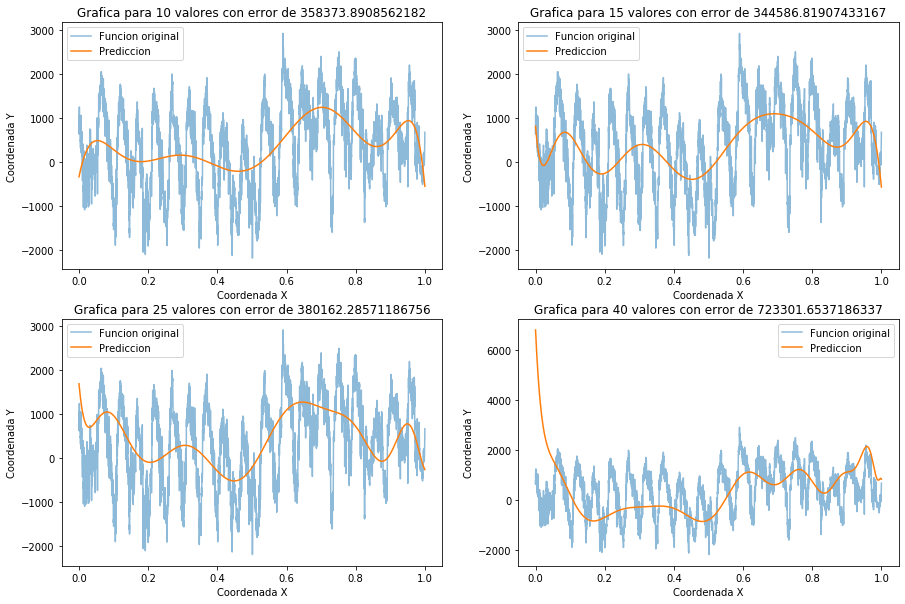

In [9]:
ms = np.array([10, 15, 25, 40])

plt.subplots(2,2,figsize=(15,10))
i = 1

for m in ms:
    x = np.linspace(0, 1, len(t))
    v = np.arange(m)

    phi = generarPhi(x, v, polinomial)
    w = generarW(phi, t)
    
    y = phi @ w

    error = error_medio(t, y)
    
    plt.subplot(2, 2, i)
    
    plt.title("Grafica para " + str(m) + " valores con error de " + str(error))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    
    plt.plot(x, t, alpha=0.5)
    plt.plot(x, y)
    
    plt.legend(['Funcion original', 'Prediccion'])
    
    i+=1
    
plt.show()

La fución polinomial no resulta ser un metodo tan factible, debido a que el rango de error de la aproximacion hecha por este medio es muy alto. No importa la cantidad, no se acerca mucho a la funcion original a diferencia de otras funciones, necesitaria una funcion mas simple, cosa que es muy dificil con muchos datos

6- Usando la función exponencial genere un gráfico comparativo (subplot) usando $m = 3, 8, 13, 18$. En cada gráfico debe representar los valores de $t$ y $\hat{t}$. Interprete las gráficas y explique que esta sucediendo. Para cada gráfico calcule el error de $\hat{t}$ con respecto a $t$. (0.9). 

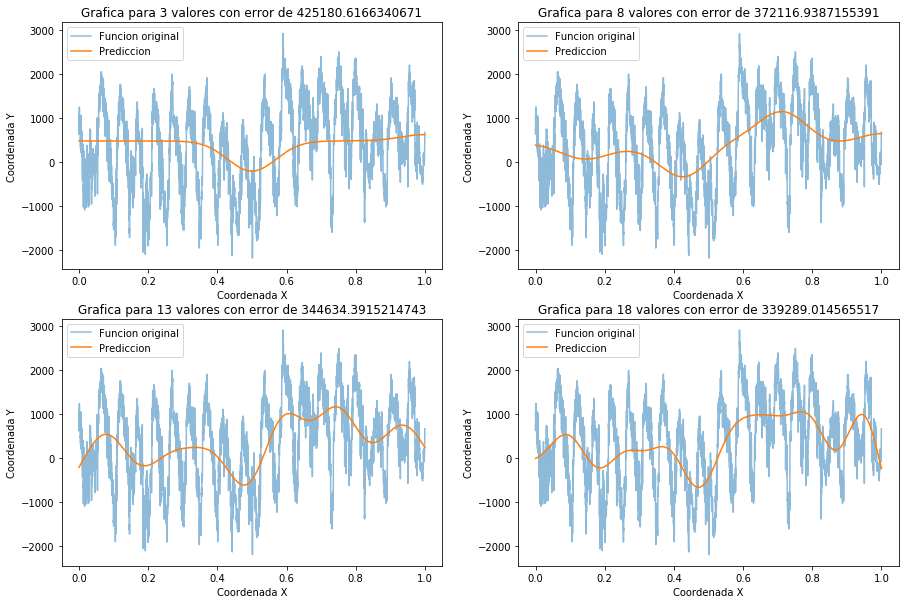

In [10]:
ms = np.array([3, 8, 13, 18])

plt.subplots(2,2,figsize=(15,10))
i = 1

for m in ms:
    x = np.linspace(0, 1, len(t))
    v = np.linspace(0, 1, m)

    phi = generarPhi(x, v, exponencial)
    w = generarW(phi, t)
    
    y = phi @ w

    error = error_medio(t, y)
    
    plt.subplot(2, 2, i)
    
    plt.title("Grafica para " + str(m) + " valores con error de " + str(error))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    
    plt.plot(x, t, alpha=0.5)
    plt.plot(x, y)
    
    plt.legend(['Funcion original', 'Prediccion'])
    
    i+=1
    
plt.show()

La funcion exponencial no resulta efectivo, esto se debe a que la cantidad de datos es muy poca, pero aun asi hace una aproximacion muy cercana con tan pocos datos a comparacion de otras funciones como el polinomial y el sigmoidal. Pero si la cantidad es mayor tendra un margen de error menor, y resultaria mas optimo que el polinomial pero en terminos computacionales requiere mucho esfuerzo, mucho mas que el polinomial y el sigmoidal, haciendolo ineficiente con muchos valores.

7- Usando la función sigmoidal genere un gráfico comparativo (subplot) usando $m = 5, 45, 120, 500$. En cada gráfico debe representar los valores de $t$ y $\hat{t}$. Interprete las gráficas y explique que esta sucediendo. Para cada gráfico calcule el error de $\hat{t}$ con respecto a $t$. (0.9)

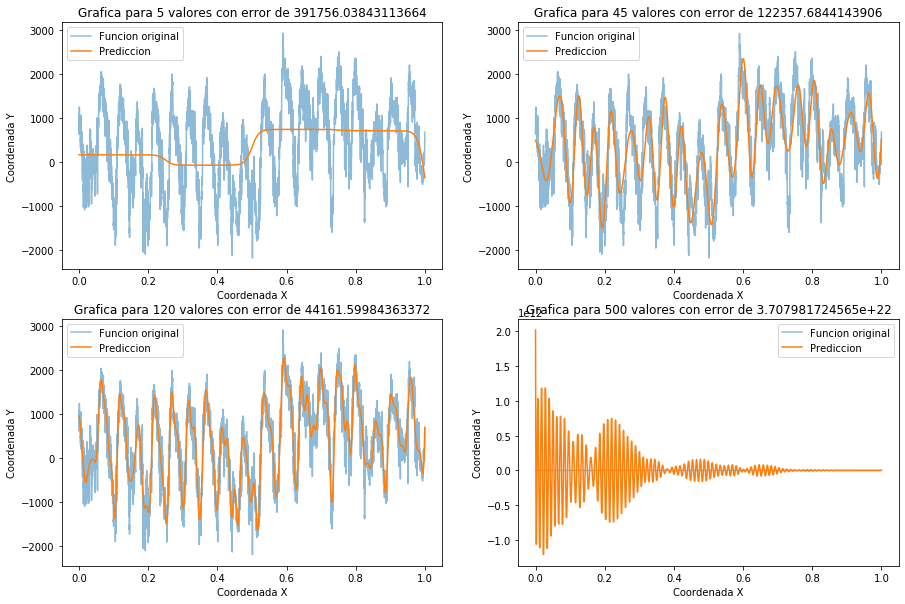

In [11]:
ms = np.array([5, 45, 120, 500])

plt.subplots(2,2,figsize=(15,10))
i = 1

for m in ms:
    x = np.linspace(0, 1, len(t))
    v = np.linspace(0, 1, m)

    phi = generarPhi(x, v, sigmoidal)
    w = generarW(phi, t)
    
    y = phi @ w

    error = error_medio(t, y)
    
    plt.subplot(2, 2, i)
    
    plt.title("Grafica para " + str(m) + " valores con error de " + str(error))
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    
    plt.plot(x, t, alpha=0.5)
    plt.plot(x, y)
    
    plt.legend(['Funcion original', 'Prediccion'])
    
    i+=1
    
plt.show()

La funcion sigmoidal a comparacion de las otras funciones a resultado mas precisa, claramente requiere una cantidad de datos suficiente para poder aproximarse a la funcion real, cosa que no es problema en las matrices de hoy en dia. lo malo es que requiere un esfuerzo computacional pero menor al de la funcion exponencial y otra cosa a recalcar es que cuando hay demasiados valores para m el método diverge.

Taller 2: Falto dar interpretación que aprovecharan más las gráficas, cómo hablar de la mejor solución entre los ejercicios planteados o del sobreajuste.

La calificación es 4.3